<a href="https://colab.research.google.com/github/adrivcccc/hello-world/blob/main/Terminado_Sutton_Chen_(C%C3%B3digo_limpio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Backend



Programa Sutton Chen 
Equipo: Alexandro Ramirez,
Adriana Vasquez,
Tania Hernandez,
Jovani Hernandez.
Fecha de entrega: 14-Nov-20 
Seminario de Ingeneiria Fisica 1


In [ ]:

import math 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from google.colab import files
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
import time
from IPython.display import clear_output
from matplotlib.collections import PolyCollection
from numpy import *
import math
import matplotlib.pyplot as plt


def switch_func(Elemento, x): #Asigna los valores de las constantes
    return {
        'Ag': lambda x: (6,12,144.41,4.0862,2.54150*10**-3),
        'Au': lambda x: (8,10,34.408,4.08,1.2793*10**-2),
        'Ni': lambda x: (6,9,39.432,3.52,1.5707*10**-2),
        'Pt': lambda x: (8,10,34.428,3.92,1.9833*10**-2),
        'Rh': lambda x: (6,12,145.658,3.8,0.49371*10**-2)
    }.get(Elemento)(x)


#calcula la distancia entre los átomo i y j, empiezan en 0
def distance(i,j): 
  dX = coords[i][0]-coords[j][0]
  dY = coords[i][1]-coords[j][1]
  dZ = coords[i][2]-coords[j][2]
  distance = math.sqrt(dX**2+dY**2+dZ**2)
  return distance


def rho_i(i,esc): #Rho es una sumatoria
    rho_i = 0
    for j in range(N):
      if(j != i):
          rho_i += ( a/(esc*distance(i,j)) )**m 
    return rho_i
    

def sum_V_i(i, esc): #V(r) = (a/r)^n 
    sum_V_i = 0
    for j in range(N):
      if(j != i):
        sum_V_i += ( a/(esc*distance(i,j)) )**n
    return sum_V_i


def Energy(esc): 
  Energy = 0
  for i in range(N): 
    Energy += (1/2)*sum_V_i(i, esc)-c*math.sqrt(rho_i(i, esc))
  Energy *= epsilon
  return Energy

def Energyi(atomo): 
  Energy = epsilon*((1/2)*sum_V_i(atomo,1)-c*math.sqrt(rho_i(atomo,1)))
  return Energy

#d es el delta de relajacion
 #i_ es átomo
 #j_ es el eje

def _relajacion(d): 
  for i in range(0,N):
    for j in range(dimensiones): 
      igual = Energyi(i)
      coords[i][j] += d
      mas = Energyi(i)
      coords[i][j] -= 2*d
      menos = Energyi(i) 
      
      if(mas-igual<0):
        if(mas-menos<0):
          coords[i][j] += 2*d
      else:
        if(igual-menos<0):
          coords[i][j] += d


####para el atomo central
def cEnergy(atomo): 
  Energy = epsilon*((1/2)*csum_V_i(atomo)-c*math.sqrt(crho_i(atomo)))
  return Energy

def crho_i(central): #Rho es una sumatoria
    rho_i = 0
    for j in range(N):
      if(j != central and distance(central,j)<radio*a):
          rho_i += ( a/(distance(central,j)) )**m 
    return rho_i
    

def csum_V_i(central): #V(r) = (a/r)^n 
    sum_V_i = 0
    for j in range(N):
      if(j != central and distance(central,j)<radio*a):
        sum_V_i += ( a/(distance(central,j)) )**n
    return sum_V_i

def Centroide(coordinates): #genera el centroide de la matriz de coordenadas y lo anexa a ella 
  L = len(coordinates)
  x=[]
  y=[]
  z=[] 
  for i in range(L):
    x.append(coordinates[i][0])
    y.append(coordinates[i][1])
    z.append(coordinates[i][2])
  centroide = (max(x)+min(x))/2.,(max(y)+min(y))/2.,(max(z)+min(z))/2.
  return centroide

      
def grafica():
  fig = plt.figure()
  ax1 = fig.add_subplot(111, projection='3d')
  ax1.scatter(coords[:,0],coords[:,1], coords[:,2], c='r')
  clear_output(wait = True)
  ax1.set_xlim(-8, 8)
  ax1.set_ylim(-8, 8)
  ax1.set_zlim(-8, 8)
  plt.show()
  energies.append(Energy(1))
  plt.plot(energies)

  #############################333
  #########################33
  ##########################
########################## element2
def rho_i2(i,esc): #Rho es una sumatoria
    rho_i2 = 0
    for j in range(N):
      if(j != i):
          rho_i2 += ( a2/(esc*distance(i,j)) )**m2 
    return rho_i2
    

def sum_V_i2(i, esc): #V(r) = (a2/r)^n 
    sum_V_i2 = 0
    for j in range(N):
      if(j != i):
        sum_V_i2 += ( a2/(esc*distance(i,j)) )**n2
    return sum_V_i2


def Energia(esc): 
  Energia = 0
  for i in range(N): 
    Energia += (1/2)*sum_V_i2(i, esc)-c2*math.sqrt(rho_i2(i, esc))
  Energia *= epsilon2
  return Energia

def Energiai(atomo): 
  Energia = epsilon2*((1/2)*sum_V_i2(atomo,1)-c2*math.sqrt(rho_i2(atomo,1)))
  return Energia

#d es el delta de relajacion
 #i_ es átomo
 #j_ es el eje

def _relajacion2(d): 
  for i in range(0,N):
    for j in range(dimensiones): 
      igual = Energiai(i)
      coords[i][j] += d
      mas = Energiai(i)
      coords[i][j] -= 2*d
      menos = Energiai(i) 
      
      if(mas-igual<0):
        if(mas-menos<0):
          coords[i][j] += 2*d
      else:
        if(igual-menos<0):
          coords[i][j] += d


####para el atomo central
def cEnergia(atomo): 
  Energia = epsilon2*((1/2)*csum_V_i2(atomo)-c2*math.sqrt(crho_i2(atomo)))
  return Energia

def crho_i2(central): #Rho es una sumatoria
    rho_i2 = 0
    for j in range(N):
      if(j != central and distance(central,j)<radio*a2):
          rho_i2 += ( a2/(distance(central,j)) )**m2 
    return rho_i2
    

def csum_V_i2(central): #V(r) = (a/r)^n 
    sum_V_i = 0
    for j in range(N):
      if(j != central and distance(central,j)<radio*a2):
        sum_V_i += ( a2/(distance(central,j)) )**n2
    return sum_V_i
      
def grafica2():
  fig = plt.figure()
  ax1 = fig.add_subplot(111, projection='3d')
  ax1.scatter(coords[:,0],coords[:,1], coords[:,2], c='r')
  clear_output(wait = True)
  ax1.set_xlim(-8, 8)
  ax1.set_ylim(-8, 8)
  ax1.set_zlim(-8, 8)
  plt.show()
  energies.append(Energia(1))
  plt.plot(energies)
      


#Frontend

In [ ]:

element1 = input("What element do you wish to plot? \nAg \nAu \nNi \nPt \nRh\n " )
while element1 not in ("Ag", "Au", "Ni", "Pt", "Rh"): 
    element1 = input("Enter Ag, Au, Ni, Pt or Rh ")
answer = input("Do you wish to add another element?\n" )
while answer not in ("yes", "no"): 
    answer = input("Enter yes or no: ") 
if answer == "yes": 
  element2 = input("What other element do you wish to plot? \nAg \nAu \nNi \nPt \nRh\n" ) 
elif answer == "no": 
    element2 = element1


#how many atoms do you want to plot
K = int(input("How many atoms do you want to plot ?\n" ))

#choose a multiple of ao
radio = float(input("Choose a multiple of ao\n" ))


print(switch_func(element1, 2), switch_func(element2,2))
elemento=switch_func(element1, 2)#asigna en forma de lista las constantes ((m,n,c,a,epsilon))


m = elemento[0]
n = elemento[1]
c = elemento[2] #e
a = elemento[3]
epsilon = elemento[4] #eV

m2 = 0
n2 = 0
c2 = 0
a2 = 0
epsilon2 = 0



What element do you wish to plot? 
Ag 
Au 
Ni 
Pt 
Rh
 Rh
Do you wish to add another element?
yes
What other element do you wish to plot? 
Ag 
Au 
Ni 
Pt 
Rh
Au
How many atoms do you want to plot ?
6
Choose a multiple of ao
1.5
(6, 12, 145.658, 3.8, 0.0049371) (8, 10, 34.408, 4.08, 0.012793)


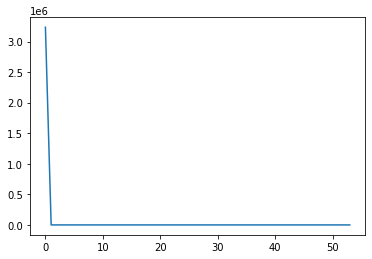

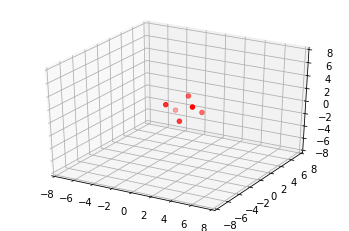

-21.86847342835267
Rh 6


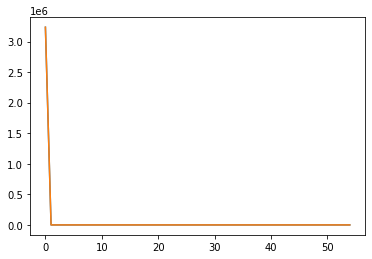

In [ ]:
dimensiones=3
energies = []
coords = np.array([[1,0,0],[0,2,0.],[1,2,1]])
N = coords.shape[0]

while N<K:
  _relajacion(.2)
  coords = np.append(coords,[[0,0,0]], axis=0)
  for i in range(5): 
    _relajacion(.1)
  N = coords.shape[0]
print(N)
grafica()


# energies = []

coords/=10
for i in range(1,101):
  if(i%int(25)==0): grafica()
  _relajacion(.9/i)
delta = .4

for i in range(1,50):
  for j in range(1,50):
    if(j%int(25)==0): grafica()
    _relajacion(.9/((i)*j))
delta = .4


grafica()

print(min(energies)) 
print(element1, K)
plt.plot(energies)



In [ ]:
#CENTROIDE

##############################333333333
#agrega el centroide a la matriz de coordenadas
coords = np.append(coords, [Centroide(coords)], axis=0)

#imprime y calcula la energía del átomo central a un radio de  tal
central = 0
for i in range(N):
  if(distance(i,N)<distance(central,N)): central = i
print("Átomo central")
print(central)

 #[parametros de red]
print("Energía del átomo central")
print(cEnergy(central))

print(element1, "No de atomos:", K)
#print(coords) #imprime matriz coords

Átomo central
3
Energía del átomo central
-3.6447577925310823
Rh No de atomos: 6


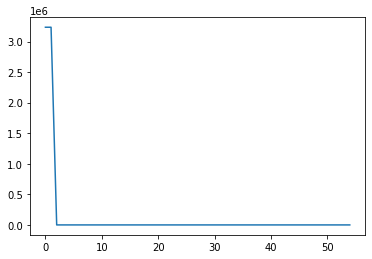

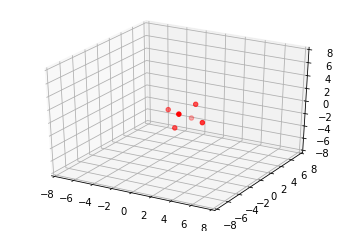

-21.470757769989156
Au 6
Átomo central
5
Energía del átomo central
-3.057162716661479
Au No de atomos: 6


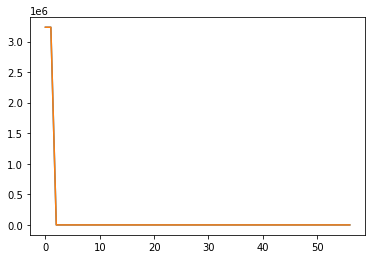

In [ ]:
#Element2

elemento=switch_func(element2, 2)#asigna en forma de lista las constantes ((m2,n2,c2,a2,epsilon2))
m2 = elemento[0]
n2 = elemento[1]
c2 = elemento[2] #e
a2 = elemento[3]
epsilon2 = elemento[4] #eV


dimensiones=3
energies = []
coords = np.array([[1,0,0],[0,2,0.],[1,2,1]])
N = coords.shape[0]

while N<K:
  _relajacion2(.2)
  coords = np.append(coords,[[0,0,0]], axis=0)
  for i in range(5): 
    _relajacion2(.1)
  N = coords.shape[0]
print(N)
grafica()


N = coords.shape[0]
# energies = []
grafica()

coords/=10
for i in range(1,101):
  if(i%int(25)==0): grafica()
  _relajacion2(.9/i)
delta = .4

for i in range(1,50):
  for j in range(1,50):
    if(j%int(25)==0): grafica()
    _relajacion2(.9/((i)*j))
delta = .4


energies.append(Energia(1))
grafica()

print(min(energies)) 
print(element2, K)
plt.plot(energies)

#agrega el centroide a la matriz de coordenadas
coords = np.append(coords, [Centroide(coords)], axis=0)

#imprime y calcula la energía del átomo central a un radio de  tal
central = 0
for i in range(N):
  if(distance(i,N)<distance(central,N)): central = i
print("Átomo central")
print(central)

 #[parametros de red]
print("Energía del átomo central")
print(cEnergia(central))

print(element2, "No de atomos:", K)
#print(coords) #imprime matriz coords







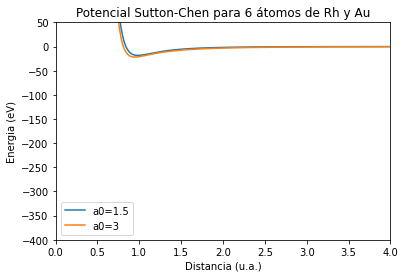

In [ ]:
#Gráfica conjunta
_a = 0 #inicio del rango a graficar
_b = 20 #final del rango a graficar


_c = 1000 #VARIABLE SUAVIZADORA (DIVISIONES DEL RANGO) entre más divisiones, más suave

x = linspace(_a,_b,_c)
first = [Energia(_b*i/(_c+1)) for i in range(_a+1,_c+1)]
second = [Energy(_b*i/(_c+1)) for i in range(_a+1,_c+1)]  
plt.plot(x, first, label= 'a0=1.5')
plt.plot(x, second, label= 'a0=3')
plt.ylim((-400, 50))
plt.xlim((_a, 4))
plt.xlabel(r'Distancia (u.a.)')
plt.ylabel(r'Energia (eV)')
title1= "Potencial Sutton-Chen para {} átomos de {} y {}" .format(K, element1, element2)
plt.title(title1)
plt.savefig("qSutton Chen Potential for", dpi =720)
plt.legend()
plt.show()


#Ponerle unidades a la distancia